## Import required library

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


## Upload data

In [5]:

import pandas as pd

# Load your Excel file
file_path = 'd:\cust_data.xlsx'  # Update this to the location of your file
df = pd.read_excel(file_path)

# Display the first few rows of the file
print(df.head())


<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Hp15\AppData\Local\Temp\ipykernel_688\538463748.py:4: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'd:\cust_data.xlsx'  # Update this to the location of your file


   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0         0  ...   0     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          0           0         0          0          0

In [6]:
data = pd.read_excel('d:\cust_data.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Hp15\AppData\Local\Temp\ipykernel_688\4261917418.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = pd.read_excel('d:\cust_data.xlsx')


In [7]:
data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Data preprocessing
Data preprocessing is the process of cleaning and transforming raw data into a format that is more suitable for analysis. It can help to improve the accuracy and reliability of the results.

In [8]:
# Check information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [9]:
# Find dupilicated value
data.duplicated().sum ()

0

In [10]:
# Find null values
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [11]:
data['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [18]:
# Sum of 'M' before fill null value
sum_of_M = (data['Gender']=='M').sum()
sum_of_M

5222

In [19]:
# Sum of 'F' before fill null value
sum_of_F = (data['Gender']=='F').sum()
sum_of_F

22054

In [20]:
data['Gender'].mode() # Female is dominated in the result 

0    F
Name: Gender, dtype: object

In [21]:
# Fill the null values
data['Gender'] = data['Gender'].fillna('F')

In [22]:
# Re check null values
data.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [23]:
# Sum of 'M' and 'F' after fill null value
data['Gender'].value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


## Exploratory data analysis (EDA)



C:\Users\Hp15\AppData\Local\Temp\ipykernel_688\1907158914.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




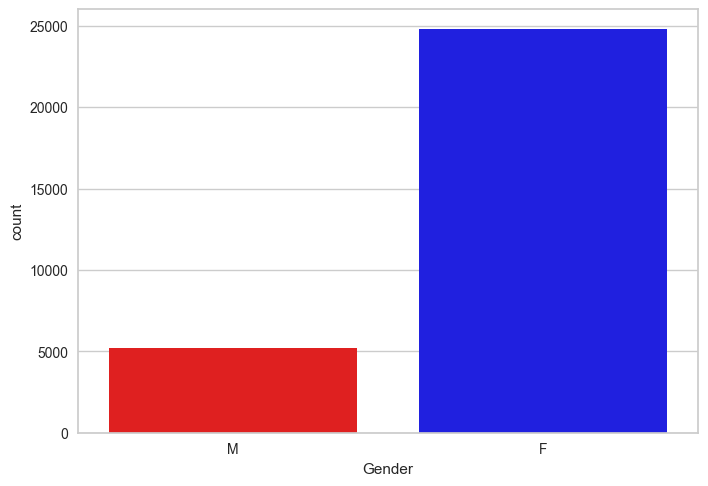

In [26]:
# Plot to check the count of male and female customers
sns.countplot(data, x='Gender', palette={'M': 'red', 'F': 'blue'})
plt.show()

In [27]:
# Find top customers
data_1 = data.copy()
data_1['Total orders'] = data_1.iloc[:,3:].sum(axis=1)
data_1.sort_values('Total orders',ascending=False)


,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total orders
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


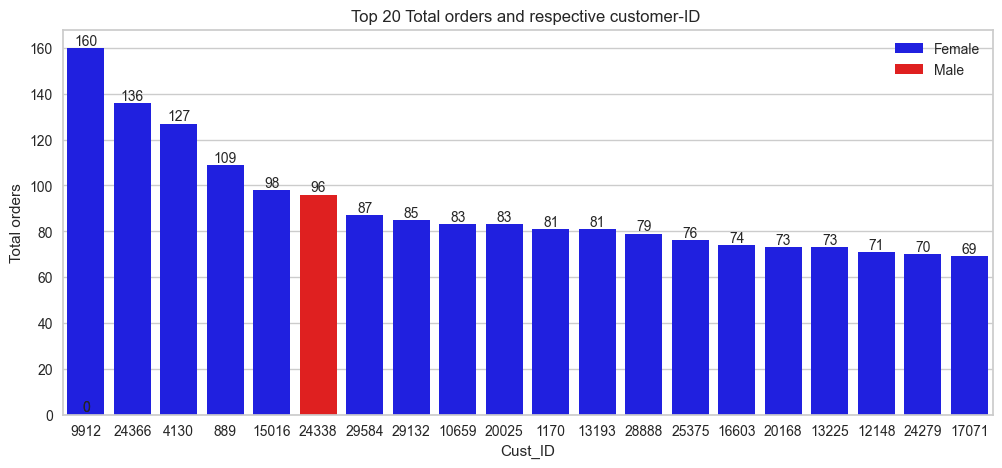

In [28]:
# Top 20 Customers 

plt.figure(figsize=(12, 5))
plt_data = data_1.sort_values('Total orders', ascending=False)[['Cust_ID', 'Gender', 'Total orders']].head(20)

ax = sns.barplot(data=plt_data,
                 x='Cust_ID',
                 y='Total orders',
                 hue='Gender',  
                 palette=['blue', 'red'],  
                 order=plt_data.sort_values('Total orders', ascending=False).Cust_ID)

# Displaying count on top of each bar
for p in ax.patches:
    if not pd.isnull(p.get_height()):  # Check for NaN values
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Legend customization
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], loc='upper right')  # Updated legend labels

plt.title("Top 20 Total orders and respective customer-ID ")
plt.show()


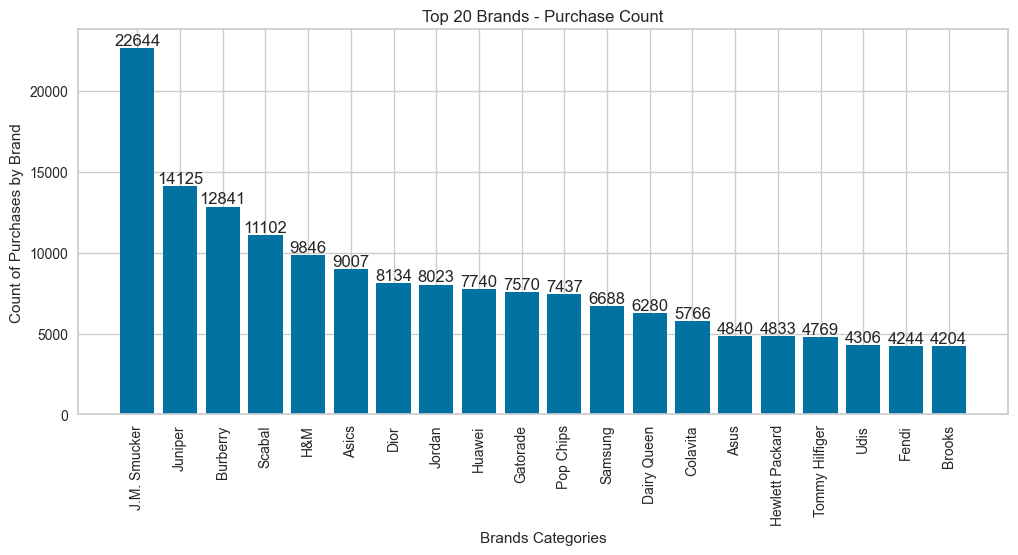

In [29]:
# Top 20 Brands

# Assign plot size
plt.figure(figsize=(12, 5))

# Assuming data_1 is a DataFrame with columns containing numerical values
data_2 = data.iloc[:, 3:-1].sum()
top_20 = data_2.nlargest(20)

# Plotting the bar chart
plt.bar(top_20.index, top_20.values)

# Adding labels and title to the chart
plt.xlabel('Brands Categories')
plt.ylabel('Count of Purchases by Brand')
plt.title('Top 20 Brands - Purchase Count')

# Displaying the count on top of the bars
for i, value in enumerate(top_20.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the chart
plt.show()

## K - Mean cluster

In [30]:
data_to_scale = data.iloc[:, 3: ]
data_to_scale.head(5)

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [31]:
# Create a MinMaxScaler object
scaler_mM = MinMaxScaler()

# Fit the scaler to the data and transform it
mM_scaled_data = scaler_mM.fit_transform(data_to_scale)
mM_scaled_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [32]:
# Create Dataframe for scaled data
mM_scaled_data_df = pd.DataFrame(mM_scaled_data,columns = data_to_scale.columns)
mM_scaled_data_df

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.1250,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
1,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
2,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.083333,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
29996,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
29997,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0625,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
29998,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000


### 2) Finding the optimum number of 'K' value


Number of Clusters: 2 - Silhouette Score: 0.3460430695919114
Number of Clusters: 3 - Silhouette Score: 0.3476377412265308
Number of Clusters: 4 - Silhouette Score: 0.3425874508121897
Number of Clusters: 5 - Silhouette Score: 0.18063832412641295
Number of Clusters: 6 - Silhouette Score: 0.2850262451402906
Number of Clusters: 7 - Silhouette Score: 0.18722831147832325
Number of Clusters: 8 - Silhouette Score: 0.24663170284089428

Best k value: 3 (Silhouette Score: 0.3476377412265308)


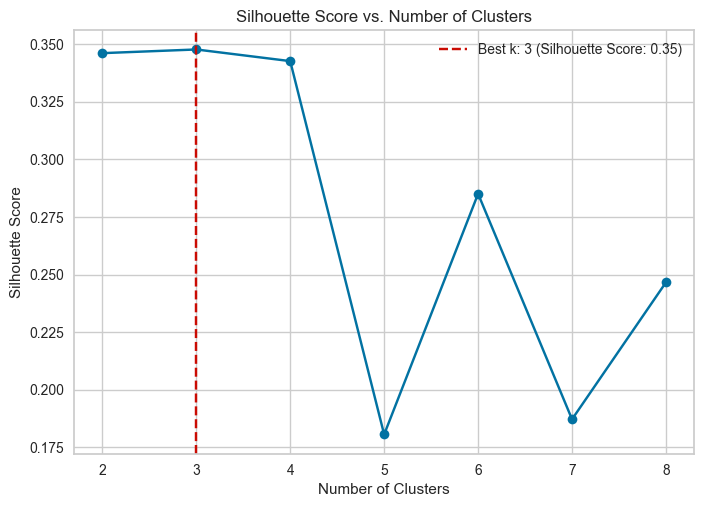

In [33]:
best_score = -1
best_k = -1
best_labels = None

silhouette_scores = []  

for n_clusters in range(2,9):
    # Perform clustering using K-means
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    labels = kmeans.fit_predict(mM_scaled_data)

    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(mM_scaled_data, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Print the Silhouette Score for each number of clusters
    print(f"Number of Clusters: {n_clusters} - Silhouette Score: {silhouette_avg}")

    # Check if the current Silhouette Score is the best
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = n_clusters
        best_labels = labels

# Print the best k value
print(f"\nBest k value: {best_k} (Silhouette Score: {best_score})")    
        
# Plot the line graph
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# Highlight the best k value
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k: {best_k} (Silhouette Score: {best_score:.2f})')
plt.legend()

# Display the plot
plt.show()

### 3) Creat K-means Model

Cluster 1:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06666667 0.         ... 0.07142857 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.08333333 0.         0.         ... 0.         0.         0.        ]]
Cluster 2:
[[0.         0.06666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.125      0.0625    ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06666667 0.         ... 0.         0.25       0.        ]
 [0.25       0.         0.         ... 0.         0.         0.        ]
 [0.125      0.         0.         ... 0.07142857 0.         0.        ]]
Cluster 3:
[[0.         0.13333333 0.         ... 0.         0.         0.        ]
 [0.  

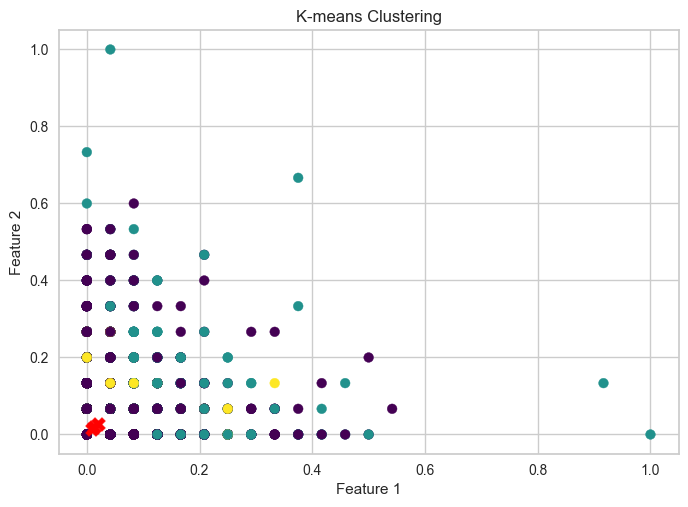

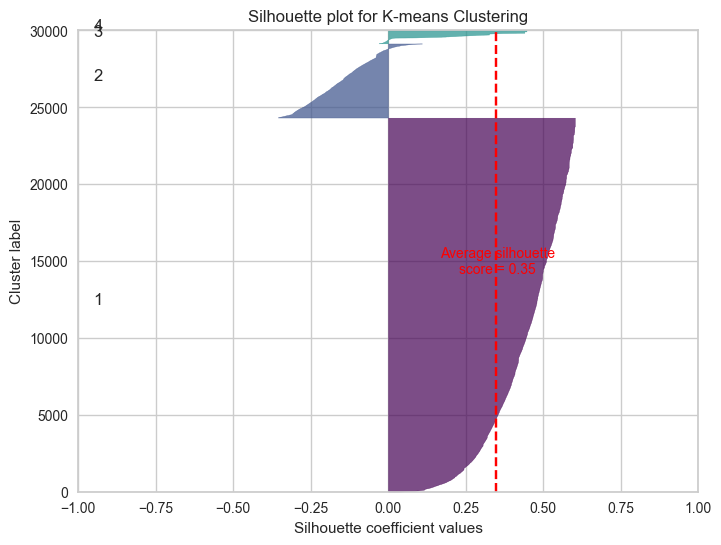

In [34]:
# Create and fit the K-means model
kmeans_model = KMeans(n_clusters=3, random_state=10, n_init=10)
fit_model = kmeans_model.fit(mM_scaled_data)

# Get the cluster labels and cluster centers
labels = fit_model.labels_
cluster_centers = fit_model.cluster_centers_

# Print separate clusters
for i in range(max(labels) + 1):
    cluster_points = mM_scaled_data[labels == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)

# Draw scatter plot
plt.scatter(mM_scaled_data[:, 0], mM_scaled_data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

# Compute silhouette scores
silhouette_avg = silhouette_score(mM_scaled_data, labels)
sample_silhouette_values = silhouette_samples(mM_scaled_data, labels)

# Plot the silhouette plot
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlim([-1, 1])
ax1.set_ylim([0, len(mM_scaled_data) + (4 + 1) * 10])

y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.95, y_lower + 0.5 * size_cluster_i, str(i + 1))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for K-means Clustering")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.annotate('Average silhouette\nscore = {:.2f}'.format(silhouette_avg), xy=(silhouette_avg, len(mM_scaled_data) / 2),
              xytext=(1.05, 0), textcoords='offset points', ha='center', va='center', fontsize=10, color="red")

plt.show()

#### Final output

In [26]:
# Cluster lable
labels

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
# Scale data output
cluster_analysis_data = mM_scaled_data_df.copy()
cluster_analysis_data['Cluster number'] = labels
cluster_analysis_data

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster number
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.1250,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
1,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1
2,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,0
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.083333,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
29996,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
29997,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0625,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
29998,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0


In [36]:
# Finl output
Original_data_cluster_no = data.copy()
Original_data_cluster_no['Cluster number'] = labels
Original_data_cluster_no

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster number
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4) Analysis of the result based on clusters and prediction of the final result

#### Cluster - 1

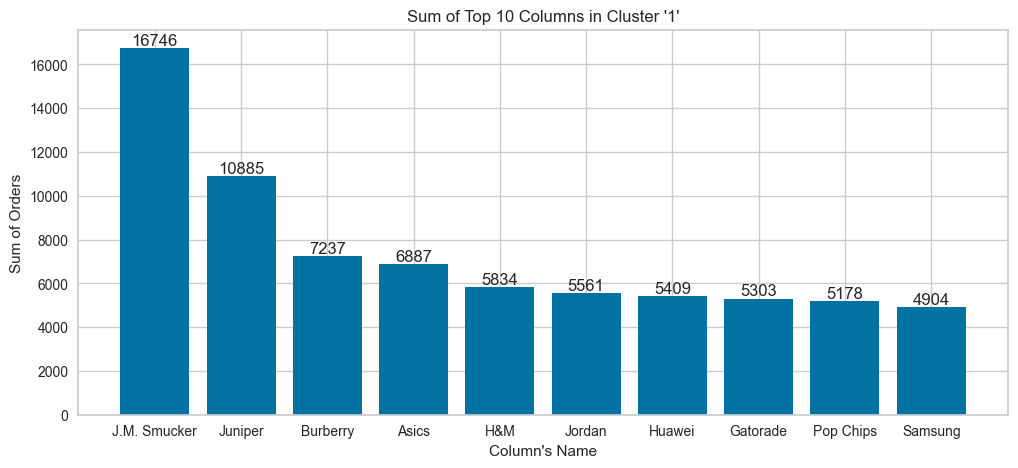

In [37]:
# Group the rows by the value 0 in the "Cluster number" column
grouped_df1 = Original_data_cluster_no[Original_data_cluster_no['Cluster number'] == 0]

# Calculate the sum of columns in the grouped DataFrame
column_sums1 = grouped_df1.iloc[:, 3:-1].sum()

# Sort the values in descending order and select the top 10
top_10_values1 = column_sums1.sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the bar chart
plt.bar(top_10_values1.index, top_10_values1.values)

# Set the labels and title for the chart
plt.xlabel("Column's Name")
plt.ylabel("Sum of Orders")
plt.title("Sum of Top 10 Columns in Cluster '1'")

# Print the sum values on top of the bars
for i, a in enumerate(top_10_values1.values):
    plt.text(i, a, str(a), ha='center', va='bottom')
    
# Show the plot
plt.show()

#### Cluster - 2

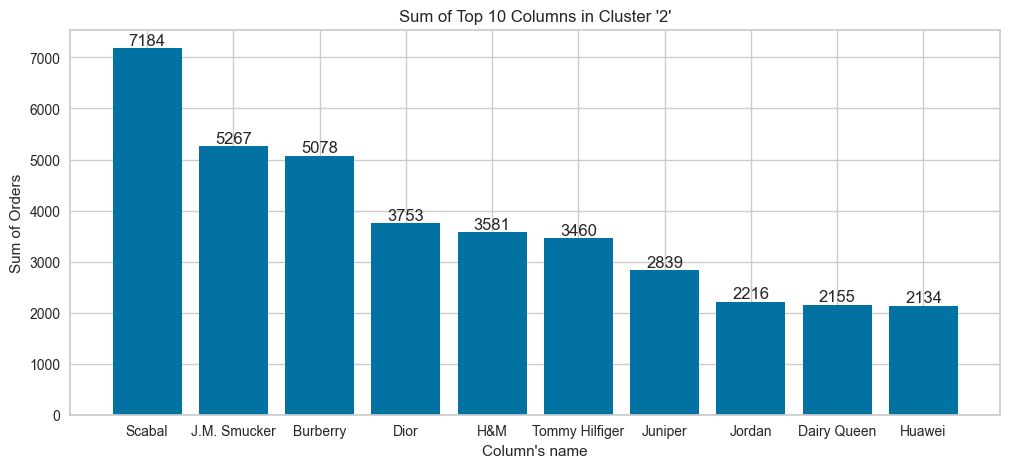

In [38]:
# Group the rows by the value 1 in the "Cluster number" column
grouped_df2 = Original_data_cluster_no[Original_data_cluster_no['Cluster number'] == 1]

# Calculate the sum of columns in the grouped DataFrame
column_sums2 = grouped_df2.iloc[:, 3:-1].sum()

# Sort the values in descending order and select the top 10
top_10_values2 = column_sums2.sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the bar chart
plt.bar(top_10_values2.index, top_10_values2.values)

# Set the labels and title for the chart
plt.xlabel("Column's name")
plt.ylabel("Sum of Orders")
plt.title("Sum of Top 10 Columns in Cluster '2'")

# Print the sum values on top of the bars
for j, b in enumerate(top_10_values2.values):
    plt.text(j, b, str(b), ha='center', va='bottom')

# Show the plot
plt.show()

#### Cluster - 3

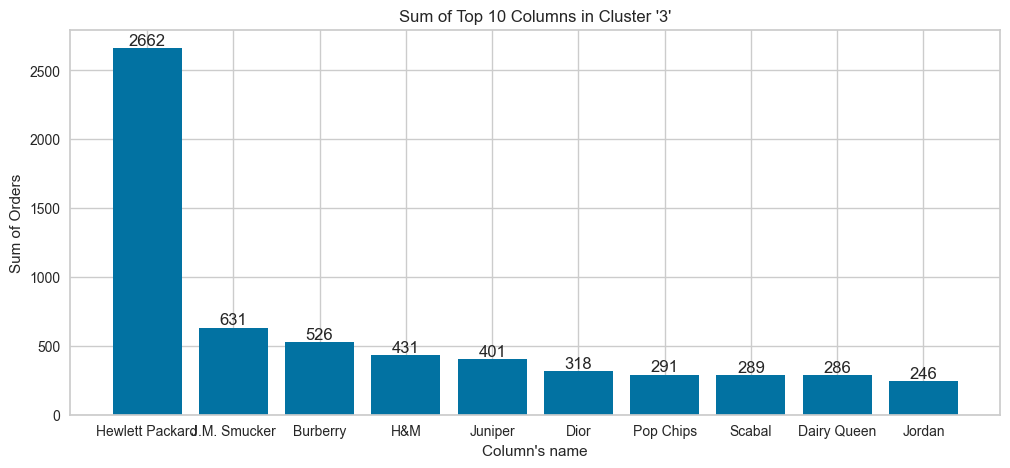

In [39]:
# Group the rows by the value 2 in the "Cluster number" column
grouped_df3 = Original_data_cluster_no[Original_data_cluster_no['Cluster number'] == 2]

# Calculate the sum of columns in the grouped DataFrame
column_sums3 = grouped_df3.iloc[:, 3:-1].sum()

# Sort the values in descending order and select the top 10
top_10_values3 = column_sums3.sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 5))


# Plot the bar chart
plt.bar(top_10_values3.index, top_10_values3.values)

# Set the labels and title for the chart
plt.xlabel("Column's name")
plt.ylabel("Sum of Orders")
plt.title("Sum of Top 10 Columns in Cluster '3'")

# Print the sum values on top of the bars
for k, c in enumerate(top_10_values3.values):
    plt.text(k, c, str(c), ha='center', va='bottom')

# Show the plot
plt.show()

# Final result and conclusion

#### Cluster 1  
Asics, Burberry, Gatorade, H&M, Huawei, J.M. Smucker, Jordan, Juniper, Pop Chips, Samsung           

#### Cluster 2
Burberry, Dairy Queen, Dior, H&M, Huawei, J.M. Smucker, Jordan, Juniper, Scabal, Tommy Hilfiger             

#### Cluster 3
Burberry, Dairy Queen, Dior, Hewlett Packard, H&M, Pop Chips, J.M. Smucker, Jordan, Juniper, Scabal



#### Top brands
- Food industry: J.M. Smucker, Smucker 
- Technology: Hewlett Packard

#### Based on the provided clusters, the common terms among all three clusters
- Clothing and related industry: Burberry, H&M, Jordan
- Technology: Huawei, Juniper
- Food industry: J.M. Smucker, 

#### Based on the provided clusters, the common terms among at least two clusters
- Food industry: Dairy Queen, Pop Chips
- Clothing and related industries: Dior, 


# Conclusion
- The **Food industry, Clothing and related industries, Technology** are the most dominant industries in the customers

